In [1]:
import numpy as np

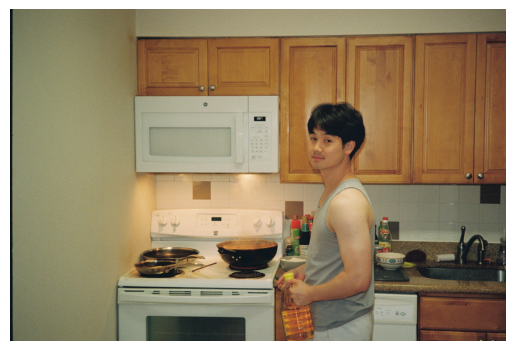

['a horny man', 'a handsome man', 'a cat']
Label probs: [[0.06405795 0.93355566 0.00238643]]


In [11]:
import torch
import clip
from PIL import Image


device = "mps" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)
pic_name = "example_img/002877-R1-010-3A.jpg"
image = preprocess(Image.open(pic_name)).unsqueeze(0).to(device)
list_of_text = ["a horny man", "a handsome man", "a cat"]
text = clip.tokenize(list_of_text).to(device)

from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = pic_name
img = Image.open(image_path)

# Show the image using PIL's built-in method
# img.show()

# Alternatively, you can use matplotlib to display the image
plt.imshow(img)
plt.axis('off')  # To hide axes
plt.show()

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()
print(list_of_text)
print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]